# Week 03: Quadratic Functions & Parabolas

**Course:** Mathematics for Data Science I (BSMA1001)  
**Week:** 3 of 12  
**Topics:** Quadratic Functions, Parabolas, Vertex, Optimization, Quadratic Formula  
**Last Updated:** November 16, 2025

---

## 📚 Learning Objectives

By the end of this notebook, you will be able to:

1. **Recognize** quadratic functions and understand their properties
2. **Convert** between standard form, vertex form, and factored form
3. **Find** vertex, axis of symmetry, and intercepts
4. **Complete** the square to derive vertex form
5. **Apply** the quadratic formula to find roots
6. **Interpret** the discriminant to determine root nature
7. **Solve** optimization problems (finding maxima and minima)
8. **Graph** parabolas with transformations
9. **Apply** quadratic concepts to machine learning and optimization
10. **Implement** all concepts in Python with visualizations

---

## 🎯 Why This Matters for Data Science

- **Loss Functions**: Mean Squared Error (MSE) is quadratic in errors
- **Optimization**: Many ML problems minimize quadratic objectives
- **Polynomial Features**: x² features capture non-linear relationships
- **Regularization**: Ridge regression uses quadratic penalties
- **Physics Simulations**: Projectile motion, trajectories
- **Business**: Revenue/cost optimization often involves quadratics
- **Computer Vision**: Parabolic fitting for curve detection

---

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize_scalar
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sympy as sp

# Set plotting style for professional visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# For symbolic math
sp.init_printing()

print("✓ Libraries imported successfully")
print("✓ Environment ready for Quadratic Functions exploration!")
print(f"✓ NumPy version: {np.__version__}")
print(f"✓ Matplotlib backend: {plt.get_backend()}")

ModuleNotFoundError: No module named 'sympy'

## 1. Quadratic Functions: Definition & Forms

### 📖 What is a Quadratic Function?

A **quadratic function** is a polynomial function of degree 2:

$$f(x) = ax^2 + bx + c$$

where **a ≠ 0** (otherwise it's linear!)

**Components**:
- **a** (leading coefficient): Controls opening direction and width
- **b** (linear coefficient): Affects axis of symmetry position
- **c** (constant): Y-intercept value

**Graph**: Always a **parabola** (U-shaped or ∩-shaped curve)

---

### 🔄 Three Forms of Quadratic Functions

| Form | Equation | Best For | Key Information |
|------|----------|----------|----------------|
| **Standard** | f(x) = ax² + bx + c | General algebra | Y-intercept (c) |
| **Vertex** | f(x) = a(x-h)² + k | Graphing, optimization | Vertex (h,k) |
| **Factored** | f(x) = a(x-r₁)(x-r₂) | Finding roots | X-intercepts (r₁, r₂) |

---

### 📐 Parabola Properties

**Opening Direction**:
- **a > 0**: Opens upward ∪ → has **minimum**
- **a < 0**: Opens downward ∩ → has **maximum**

**Width**:
- **|a| > 1**: Narrower (stretched vertically)
- **|a| < 1**: Wider (compressed vertically)
- **|a| = 1**: Standard width (like y = x²)

**Key Features**:
1. **Vertex (h, k)**: Turning point (max or min)
2. **Axis of Symmetry**: x = h (vertical line through vertex)
3. **Y-intercept**: (0, c)
4. **X-intercepts** (roots): Where f(x) = 0

---

### 📍 Finding the Vertex

**From Standard Form**: f(x) = ax² + bx + c

$$h = -\frac{b}{2a}, \quad k = f(h)$$

**From Vertex Form**: f(x) = a(x-h)² + k

Vertex = (h, k) — read directly!

**Axis of Symmetry**: x = h = -b/(2a)

---

## 2. Visualizing Parabolas: Effect of Parameters

Let's explore how parameters a, b, c affect the parabola's shape and position!

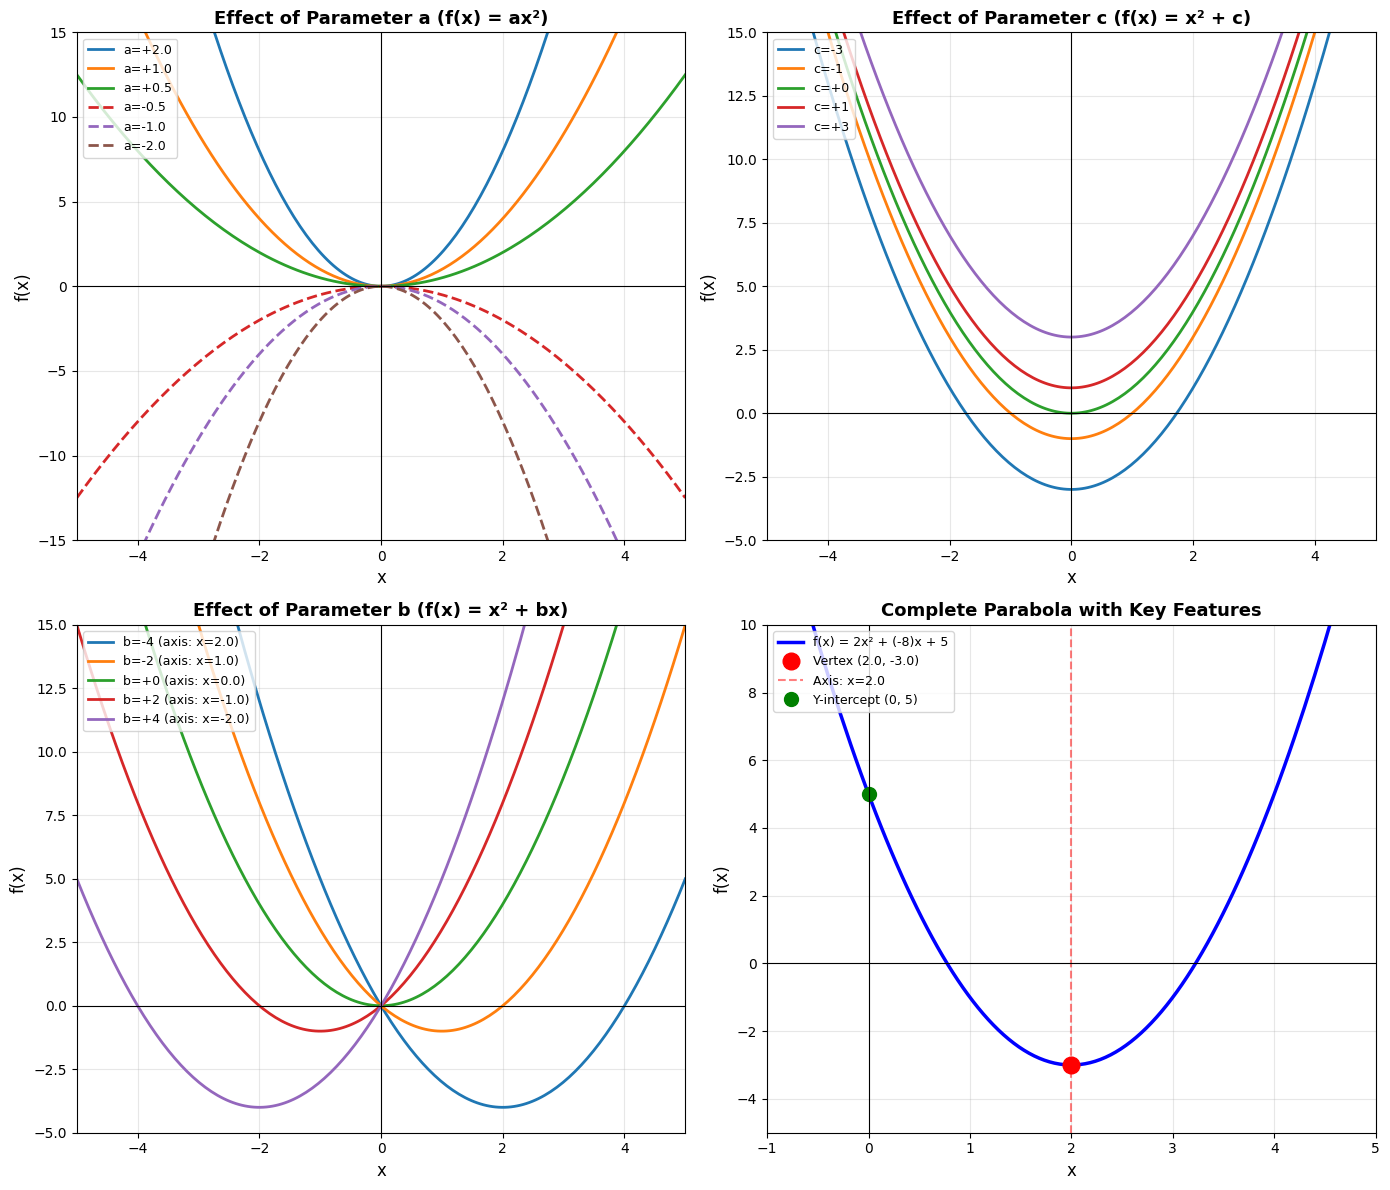

📊 Key Observations:
  • a > 0: Opens upward; a < 0: Opens downward
  • |a| > 1: Narrower; |a| < 1: Wider
  • c: Vertical shift (y-intercept)
  • b: Affects horizontal position (axis of symmetry)

✓ Example: f(x) = 2x² + (-8)x + 5
  Vertex: (2.0, -3.0)
  Opens: upward (has minimum)


In [2]:
# Visualizing Effect of Parameters

def quadratic(x, a, b, c):
    """Quadratic function: f(x) = ax^2 + bx + c"""
    return a * x**2 + b * x + c

x = np.linspace(-5, 5, 200)

# Create subplots for different parameter effects
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Effect of 'a' (opening direction and width)
ax = axes[0, 0]
for a_val in [2, 1, 0.5, -0.5, -1, -2]:
    y = quadratic(x, a_val, 0, 0)
    label = f'a={a_val:+.1f}'
    linestyle = '-' if a_val > 0 else '--'
    ax.plot(x, y, label=label, linewidth=2, linestyle=linestyle)

ax.axhline(y=0, color='black', linewidth=0.8)
ax.axvline(x=0, color='black', linewidth=0.8)
ax.set_xlim(-5, 5)
ax.set_ylim(-15, 15)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('Effect of Parameter a (f(x) = ax²)', fontsize=13, fontweight='bold')
ax.legend(fontsize=9, loc='upper left')
ax.grid(True, alpha=0.3)

# Plot 2: Effect of 'c' (vertical shift)
ax = axes[0, 1]
for c_val in [-3, -1, 0, 1, 3]:
    y = quadratic(x, 1, 0, c_val)
    ax.plot(x, y, label=f'c={c_val:+d}', linewidth=2)

ax.axhline(y=0, color='black', linewidth=0.8)
ax.axvline(x=0, color='black', linewidth=0.8)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 15)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('Effect of Parameter c (f(x) = x² + c)', fontsize=13, fontweight='bold')
ax.legend(fontsize=9, loc='upper left')
ax.grid(True, alpha=0.3)

# Plot 3: Effect of 'b' (horizontal shift via axis of symmetry)
ax = axes[1, 0]
for b_val in [-4, -2, 0, 2, 4]:
    y = quadratic(x, 1, b_val, 0)
    # Axis of symmetry: x = -b/(2a)
    axis_sym = -b_val / 2
    ax.plot(x, y, label=f'b={b_val:+d} (axis: x={axis_sym:.1f})', linewidth=2)

ax.axhline(y=0, color='black', linewidth=0.8)
ax.axvline(x=0, color='black', linewidth=0.8)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 15)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('Effect of Parameter b (f(x) = x² + bx)', fontsize=13, fontweight='bold')
ax.legend(fontsize=9, loc='upper left')
ax.grid(True, alpha=0.3)

# Plot 4: Complete example with all parameters
ax = axes[1, 1]
# f(x) = 2x² - 8x + 5
a, b, c = 2, -8, 5
y = quadratic(x, a, b, c)

# Calculate vertex
h = -b / (2*a)
k = quadratic(h, a, b, c)

ax.plot(x, y, 'b-', linewidth=2.5, label=f'f(x) = {a}x² + ({b})x + {c}')
ax.plot(h, k, 'ro', markersize=12, label=f'Vertex ({h:.1f}, {k:.1f})', zorder=5)
ax.axvline(x=h, color='red', linestyle='--', alpha=0.5, label=f'Axis: x={h:.1f}')
ax.plot(0, c, 'go', markersize=10, label=f'Y-intercept (0, {c})')

ax.axhline(y=0, color='black', linewidth=0.8)
ax.axvline(x=0, color='black', linewidth=0.8)
ax.set_xlim(-1, 5)
ax.set_ylim(-5, 10)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('Complete Parabola with Key Features', fontsize=13, fontweight='bold')
ax.legend(fontsize=9, loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('parabola_parameters.png', dpi=150, bbox_inches='tight')
plt.show()

print("📊 Key Observations:")
print("  • a > 0: Opens upward; a < 0: Opens downward")
print("  • |a| > 1: Narrower; |a| < 1: Wider")
print("  • c: Vertical shift (y-intercept)")
print("  • b: Affects horizontal position (axis of symmetry)")
print(f"\n✓ Example: f(x) = {a}x² + ({b})x + {c}")
print(f"  Vertex: ({h:.1f}, {k:.1f})")
print(f"  Opens: {'upward (has minimum)' if a > 0 else 'downward (has maximum)'}")

## 3. Completing the Square

**Purpose**: Convert standard form to vertex form

**Why It Matters**: 
- Reveals vertex coordinates immediately
- Essential for optimization
- Foundation of deriving quadratic formula

### 🔄 Algorithm

For **f(x) = ax² + bx + c**:

**Step 1**: Factor out 'a' from first two terms
$$f(x) = a\left(x^2 + \frac{b}{a}x\right) + c$$

**Step 2**: Complete the square inside parentheses
- Take half of x-coefficient: $\frac{b}{2a}$
- Square it: $\left(\frac{b}{2a}\right)^2$
- Add and subtract it

**Step 3**: Factor the perfect square
$$f(x) = a\left(x + \frac{b}{2a}\right)^2 - a\left(\frac{b}{2a}\right)^2 + c$$

**Step 4**: Simplify
$$f(x) = a\left(x + \frac{b}{2a}\right)^2 + \left(c - \frac{b^2}{4a}\right)$$

**Result**: Vertex form with h = -b/(2a), k = c - b²/(4a)

---

Example 1: Simple quadratic
----------------------------------------------------------------------
📝 Converting f(x) = 1x² + 6x + 7 to vertex form

Step 1: Factor out a from first two terms
        f(x) = 1(x² + 6.00x) + 7

Step 2: Take half of x-coefficient and square it
        Half of 6.00 is 3.00
        Square: (3.00)² = 9.0000

Step 3: Add and subtract inside
        f(x) = 1[(x² + 6.00x + 9.0000) - 9.0000] + 7

Step 4: Factor the perfect square
        f(x) = 1(x + 3.00)² - 9.0000 + 7

Step 5: Simplify
        f(x) = 1(x - (-3.00))² + -2.0000

✓ Vertex Form: f(x) = 1(x - -3.00)² + -2.0000
✓ Vertex: (-3.00, -2.0000)
✓ Minimum value: -2.0000 at x = -3.00



Example 2: Leading coefficient a ≠ 1
----------------------------------------------------------------------
📝 Converting f(x) = 2x² + -8x + 5 to vertex form

Step 1: Factor out a from first two terms
        f(x) = 2(x² + -4.00x) + 5

Step 2: Take half of x-coefficient and square it
        Half of -4.00 is -2.00
        Square

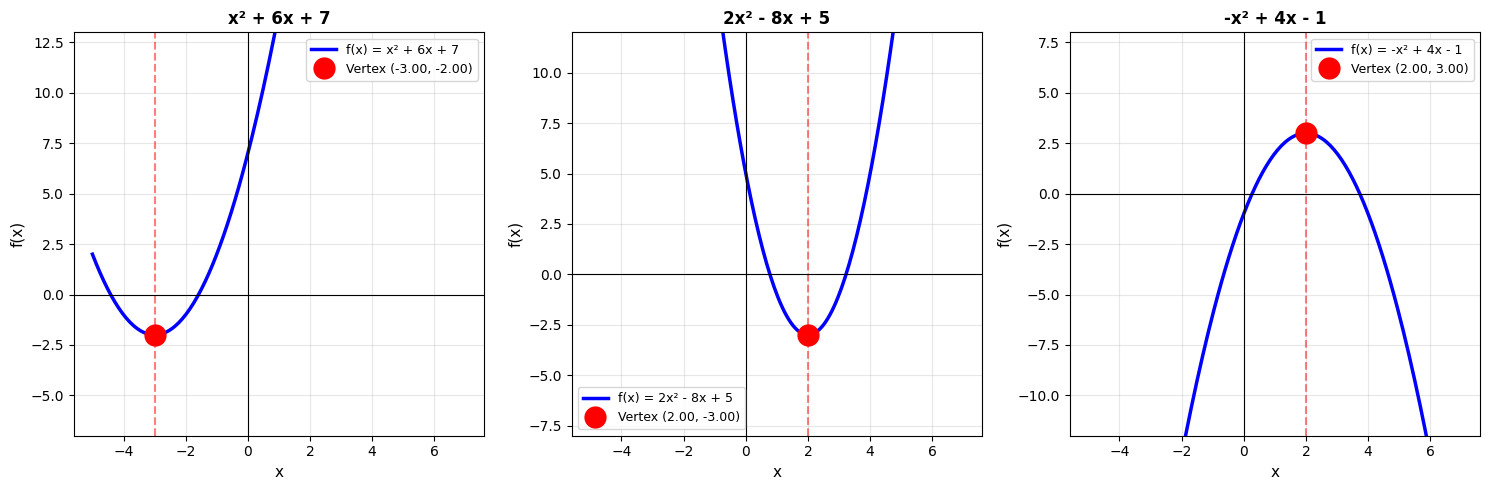


✓ All three parabolas converted to vertex form and visualized!


In [3]:
# Completing the Square: Interactive Examples

def complete_the_square(a, b, c, show_steps=True):
    """
    Convert f(x) = ax^2 + bx + c to vertex form a(x-h)^2 + k
    
    Returns: (a, h, k) where f(x) = a(x-h)^2 + k
    """
    h = -b / (2*a)
    k = c - (b**2) / (4*a)
    
    if show_steps:
        print(f"📝 Converting f(x) = {a}x² + {b}x + {c} to vertex form")
        print("="*70)
        print(f"\nStep 1: Factor out a from first two terms")
        print(f"        f(x) = {a}(x² + {b/a:.2f}x) + {c}")
        
        print(f"\nStep 2: Take half of x-coefficient and square it")
        print(f"        Half of {b/a:.2f} is {b/(2*a):.2f}")
        print(f"        Square: ({b/(2*a):.2f})² = {(b/(2*a))**2:.4f}")
        
        print(f"\nStep 3: Add and subtract inside")
        print(f"        f(x) = {a}[(x² + {b/a:.2f}x + {(b/(2*a))**2:.4f}) - {(b/(2*a))**2:.4f}] + {c}")
        
        print(f"\nStep 4: Factor the perfect square")
        print(f"        f(x) = {a}(x + {b/(2*a):.2f})² - {a*(b/(2*a))**2:.4f} + {c}")
        
        print(f"\nStep 5: Simplify")
        print(f"        f(x) = {a}(x - ({h:.2f}))² + {k:.4f}")
        
        print("\n" + "="*70)
        print(f"✓ Vertex Form: f(x) = {a}(x - {h:.2f})² + {k:.4f}")
        print(f"✓ Vertex: ({h:.2f}, {k:.4f})")
        print(f"✓ {'Minimum' if a > 0 else 'Maximum'} value: {k:.4f} at x = {h:.2f}")
        print("="*70)
    
    return a, h, k

# Example 1: f(x) = x² + 6x + 7
print("Example 1: Simple quadratic")
print("-"*70)
a1, h1, k1 = complete_the_square(1, 6, 7)

print("\n\n")

# Example 2: f(x) = 2x² - 8x + 5
print("Example 2: Leading coefficient a ≠ 1")
print("-"*70)
a2, h2, k2 = complete_the_square(2, -8, 5)

print("\n\n")

# Example 3: f(x) = -x² + 4x - 1
print("Example 3: Downward-opening parabola (a < 0)")
print("-"*70)
a3, h3, k3 = complete_the_square(-1, 4, -1)

# Visual comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
x = np.linspace(-5, 7, 200)

examples = [
    (a1, 6, 7, h1, k1, "x² + 6x + 7"),
    (a2, -8, 5, h2, k2, "2x² - 8x + 5"),
    (a3, 4, -1, h3, k3, "-x² + 4x - 1")
]

for ax, (a, b, c, h, k, title) in zip(axes, examples):
    y = a * x**2 + b * x + c
    ax.plot(x, y, 'b-', linewidth=2.5, label=f'f(x) = {title}')
    ax.plot(h, k, 'ro', markersize=15, label=f'Vertex ({h:.2f}, {k:.2f})', zorder=5)
    ax.axvline(x=h, color='red', linestyle='--', alpha=0.5)
    ax.axhline(y=0, color='black', linewidth=0.8)
    ax.axvline(x=0, color='black', linewidth=0.8)
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('f(x)', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    
    # Adjust view for each parabola
    if a > 0:
        ax.set_ylim(k - 5, k + 15)
    else:
        ax.set_ylim(k - 15, k + 5)

plt.tight_layout()
plt.savefig('completing_square.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ All three parabolas converted to vertex form and visualized!")

Example 1: Two Distinct Real Roots
----------------------------------------------------------------------
📝 Solving 1x² + -5x + 6 = 0

Step 1: Identify coefficients
        a = 1, b = -5, c = 6

Step 2: Calculate discriminant
        Δ = b² - 4ac = (-5)² - 4(1)(6)
        Δ = 25 - 24
        Δ = 1

Step 3: Determine nature of roots
        Δ > 0 → Two distinct real roots

Step 4: Apply quadratic formula
        x = (-b ± √Δ) / (2a)
        x = (--5 ± √1) / (2·1)
        x = (5 ± 1.0000) / 2

Step 5: Calculate roots
        x₁ = (5 + 1.0000) / 2 = 3.0000
        x₂ = (5 - 1.0000) / 2 = 2.0000

✓ Roots: x₁ = 3.0000, x₂ = 2.0000



Example 2: One Repeated Root
----------------------------------------------------------------------
📝 Solving 1x² + -4x + 4 = 0

Step 1: Identify coefficients
        a = 1, b = -4, c = 4

Step 2: Calculate discriminant
        Δ = b² - 4ac = (-4)² - 4(1)(4)
        Δ = 16 - 16
        Δ = 0

Step 3: Determine nature of roots
        Δ = 0 → One repeated real r

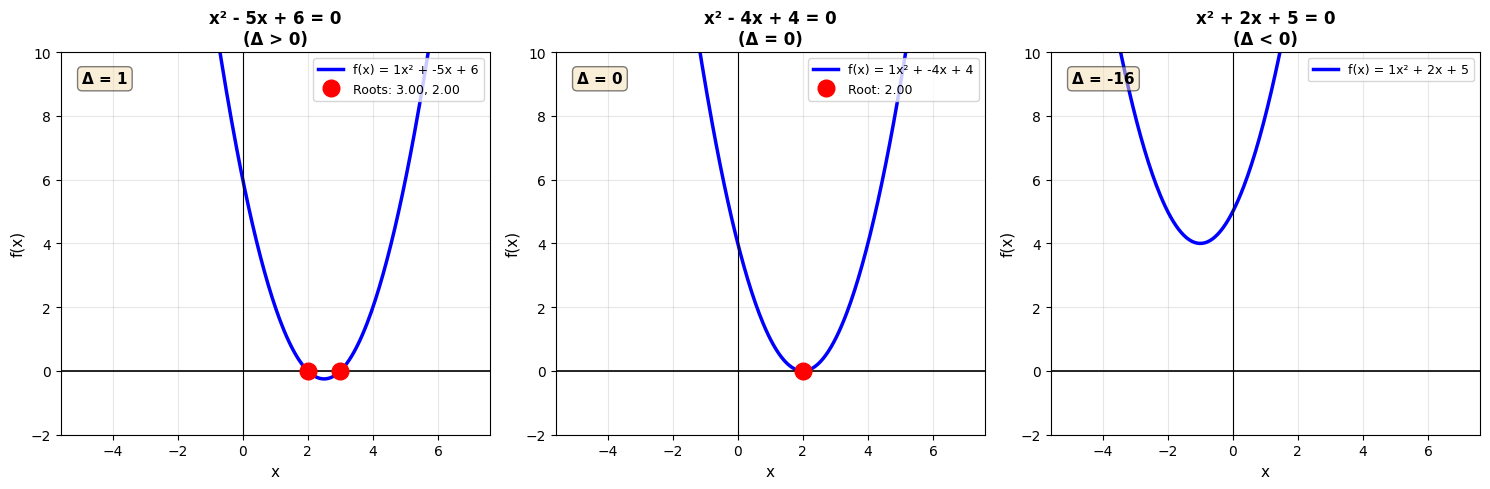


✓ All three discriminant cases visualized!

📊 Summary:
  • Δ > 0: Parabola crosses x-axis at two points
  • Δ = 0: Parabola touches x-axis at one point (vertex)
  • Δ < 0: Parabola doesn't touch x-axis


In [4]:
# Quadratic Formula and Discriminant Analysis

def solve_quadratic(a, b, c, show_steps=True):
    """
    Solve ax^2 + bx + c = 0 using quadratic formula
    Returns roots and discriminant
    """
    discriminant = b**2 - 4*a*c
    
    if show_steps:
        print(f"📝 Solving {a}x² + {b}x + {c} = 0")
        print("="*70)
        print(f"\nStep 1: Identify coefficients")
        print(f"        a = {a}, b = {b}, c = {c}")
        
        print(f"\nStep 2: Calculate discriminant")
        print(f"        Δ = b² - 4ac = ({b})² - 4({a})({c})")
        print(f"        Δ = {b**2} - {4*a*c}")
        print(f"        Δ = {discriminant}")
        
        print(f"\nStep 3: Determine nature of roots")
        if discriminant > 0:
            print(f"        Δ > 0 → Two distinct real roots")
        elif discriminant == 0:
            print(f"        Δ = 0 → One repeated real root")
        else:
            print(f"        Δ < 0 → Two complex conjugate roots")
        
        print(f"\nStep 4: Apply quadratic formula")
        print(f"        x = (-b ± √Δ) / (2a)")
        print(f"        x = (-{b} ± √{discriminant}) / (2·{a})")
        
        if discriminant >= 0:
            sqrt_disc = np.sqrt(discriminant)
            print(f"        x = ({-b} ± {sqrt_disc:.4f}) / {2*a}")
            
            x1 = (-b + sqrt_disc) / (2*a)
            x2 = (-b - sqrt_disc) / (2*a)
            
            print(f"\nStep 5: Calculate roots")
            print(f"        x₁ = ({-b} + {sqrt_disc:.4f}) / {2*a} = {x1:.4f}")
            print(f"        x₂ = ({-b} - {sqrt_disc:.4f}) / {2*a} = {x2:.4f}")
            
            print("\n" + "="*70)
            if discriminant == 0:
                print(f"✓ Root: x = {x1:.4f} (repeated)")
            else:
                print(f"✓ Roots: x₁ = {x1:.4f}, x₂ = {x2:.4f}")
            print("="*70)
            
            return (x1, x2), discriminant
        else:
            # Complex roots
            real_part = -b / (2*a)
            imag_part = np.sqrt(-discriminant) / (2*a)
            
            print(f"\nStep 5: Calculate complex roots")
            print(f"        x = {real_part:.4f} ± {imag_part:.4f}i")
            
            print("\n" + "="*70)
            print(f"✓ Complex roots: {real_part:.4f} ± {imag_part:.4f}i")
            print("="*70)
            
            return (complex(real_part, imag_part), complex(real_part, -imag_part)), discriminant
    else:
        if discriminant >= 0:
            sqrt_disc = np.sqrt(discriminant)
            x1 = (-b + sqrt_disc) / (2*a)
            x2 = (-b - sqrt_disc) / (2*a)
            return (x1, x2), discriminant
        else:
            real_part = -b / (2*a)
            imag_part = np.sqrt(-discriminant) / (2*a)
            return (complex(real_part, imag_part), complex(real_part, -imag_part)), discriminant

# Example 1: Δ > 0 (two distinct real roots)
print("Example 1: Two Distinct Real Roots")
print("-"*70)
roots1, disc1 = solve_quadratic(1, -5, 6)

print("\n\n")

# Example 2: Δ = 0 (one repeated root)
print("Example 2: One Repeated Root")
print("-"*70)
roots2, disc2 = solve_quadratic(1, -4, 4)

print("\n\n")

# Example 3: Δ < 0 (complex roots)
print("Example 3: Complex Roots")
print("-"*70)
roots3, disc3 = solve_quadratic(1, 2, 5)

# Visualize all three cases
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
x = np.linspace(-5, 7, 300)

cases = [
    (1, -5, 6, roots1, disc1, "x² - 5x + 6 = 0\n(Δ > 0)"),
    (1, -4, 4, roots2, disc2, "x² - 4x + 4 = 0\n(Δ = 0)"),
    (1, 2, 5, roots3, disc3, "x² + 2x + 5 = 0\n(Δ < 0)")
]

for ax, (a, b, c, roots, disc, title) in zip(axes, cases):
    y = a * x**2 + b * x + c
    ax.plot(x, y, 'b-', linewidth=2.5, label=f'f(x) = {a}x² + {b}x + {c}')
    
    # Mark roots if real
    if disc >= 0:
        if disc > 0:
            ax.plot([roots[0], roots[1]], [0, 0], 'ro', markersize=12, 
                   label=f'Roots: {roots[0]:.2f}, {roots[1]:.2f}', zorder=5)
        else:
            ax.plot(roots[0], 0, 'ro', markersize=12, 
                   label=f'Root: {roots[0]:.2f}', zorder=5)
    
    ax.axhline(y=0, color='black', linewidth=1.2)
    ax.axvline(x=0, color='black', linewidth=0.8)
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('f(x)', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc='upper right' if a > 0 else 'lower right')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-2, 10)
    
    # Add discriminant info
    disc_text = f'Δ = {disc:.0f}'
    ax.text(0.05, 0.95, disc_text, transform=ax.transAxes, 
           fontsize=11, fontweight='bold', verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('discriminant_cases.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ All three discriminant cases visualized!")
print("\n📊 Summary:")
print("  • Δ > 0: Parabola crosses x-axis at two points")
print("  • Δ = 0: Parabola touches x-axis at one point (vertex)")
print("  • Δ < 0: Parabola doesn't touch x-axis")

## 5. Optimization: Finding Maxima and Minima

### 🎯 Key Insight

**The vertex is ALWAYS the optimal point!**

- If **a > 0**: Parabola opens upward → vertex is **minimum**
- If **a < 0**: Parabola opens downward → vertex is **maximum**

### 📐 Finding Optimal Value

**Step 1**: Identify if looking for max or min
- Check sign of 'a'

**Step 2**: Find vertex
- h = -b/(2a) (x-coordinate where optimum occurs)
- k = f(h) (optimal value)

**Step 3**: Interpret in context
- What does h represent?
- What does k represent?

### 💼 Real-World Applications

1. **Business**: Maximize revenue, minimize cost
2. **Engineering**: Optimize design parameters
3. **Physics**: Maximum height of projectile
4. **Data Science**: Minimize loss function (MSE)

---

OPTIMIZATION PROBLEMS

📊 Problem 1: Maximize Revenue
----------------------------------------------------------------------
A company's revenue is R(x) = -2x² + 60x - 100
where x is the price in dollars.

Find the optimal price and maximum revenue.

Solution:
  a = -2 < 0 → parabola opens downward → has MAXIMUM
  Optimal price: x = -b/(2a) = -60/(2·-2) = $15.00
  Maximum revenue: R(15.00) = $350.00


📊 Problem 2: Projectile Motion
----------------------------------------------------------------------
A ball is thrown with height h(t) = -16t² + 64t + 5 feet
where t is time in seconds.

Find: (a) Maximum height, (b) When it hits the ground

Solution (a): Maximum height
  t_max = -b/(2a) = -64/(2·-16) = 2.00 seconds
  h_max = h(2.00) = 69.00 feet

Solution (b): Hits ground
  Solve: -16t² + 64t + 5 = 0
  t = -0.077 seconds (positive root)


📊 Problem 3: Maximize Area with Constraint
----------------------------------------------------------------------
A farmer has 100 meters of fencing.
W

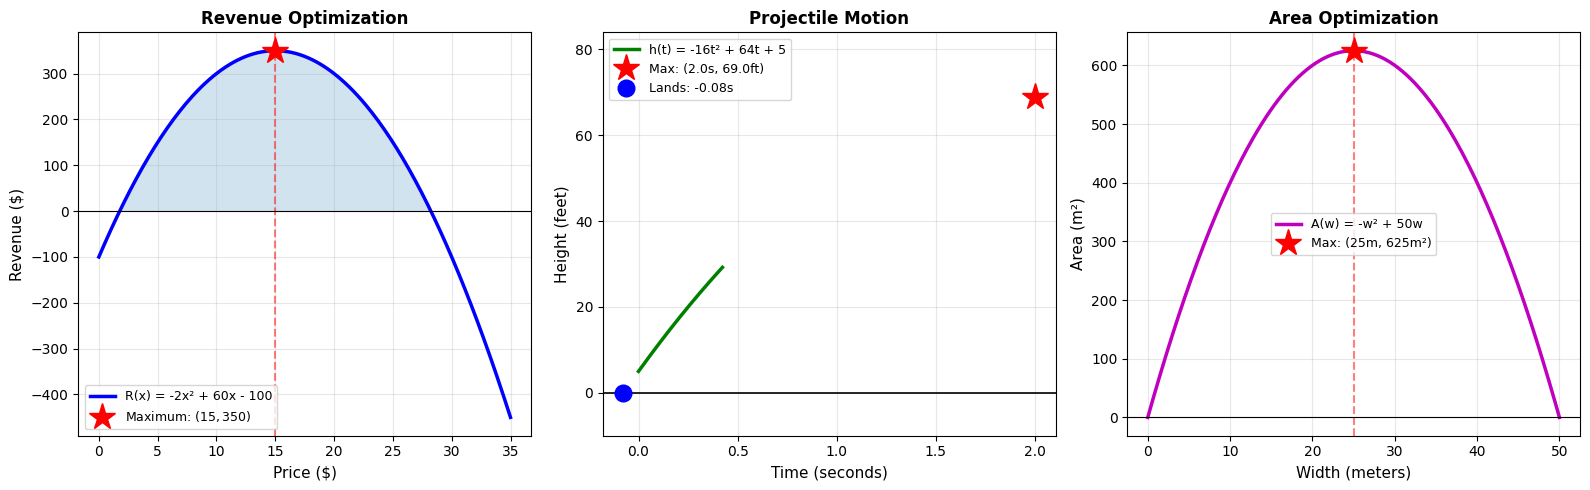


✓ All optimization problems solved and visualized!

💡 Key Insight: Vertex always gives optimal solution!
   • Maximum when a < 0 (opens down)
   • Minimum when a > 0 (opens up)


In [5]:
# Optimization Problems with Quadratic Functions

print("="*70)
print("OPTIMIZATION PROBLEMS")
print("="*70)

# Problem 1: Revenue Maximization
print("\n📊 Problem 1: Maximize Revenue")
print("-"*70)
print("A company's revenue is R(x) = -2x² + 60x - 100")
print("where x is the price in dollars.")
print("\nFind the optimal price and maximum revenue.")

a, b, c = -2, 60, -100
h = -b / (2*a)
k = a * h**2 + b * h + c

print(f"\nSolution:")
print(f"  a = {a} < 0 → parabola opens downward → has MAXIMUM")
print(f"  Optimal price: x = -b/(2a) = -{b}/(2·{a}) = ${h:.2f}")
print(f"  Maximum revenue: R({h:.2f}) = ${k:.2f}")

# Visualization
x_range = np.linspace(0, 35, 200)
revenue = a * x_range**2 + b * x_range + c

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Problem 1: Revenue
ax = axes[0]
ax.plot(x_range, revenue, 'b-', linewidth=2.5, label='R(x) = -2x² + 60x - 100')
ax.plot(h, k, 'r*', markersize=20, label=f'Maximum: (${h:.0f}, ${k:.0f})', zorder=5)
ax.axvline(x=h, color='red', linestyle='--', alpha=0.5)
ax.axhline(y=0, color='black', linewidth=0.8)
ax.set_xlabel('Price ($)', fontsize=11)
ax.set_ylabel('Revenue ($)', fontsize=11)
ax.set_title('Revenue Optimization', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.fill_between(x_range, revenue, 0, where=(revenue > 0), alpha=0.2)

# Problem 2: Projectile Motion
print("\n\n📊 Problem 2: Projectile Motion")
print("-"*70)
print("A ball is thrown with height h(t) = -16t² + 64t + 5 feet")
print("where t is time in seconds.")
print("\nFind: (a) Maximum height, (b) When it hits the ground")

a2, b2, c2 = -16, 64, 5
t_max = -b2 / (2*a2)
h_max = a2 * t_max**2 + b2 * t_max + c2

print(f"\nSolution (a): Maximum height")
print(f"  t_max = -b/(2a) = -{b2}/(2·{a2}) = {t_max:.2f} seconds")
print(f"  h_max = h({t_max:.2f}) = {h_max:.2f} feet")

# Find when it hits ground (h = 0)
disc = b2**2 - 4*a2*c2
t_ground = (-b2 + np.sqrt(disc)) / (2*a2)

print(f"\nSolution (b): Hits ground")
print(f"  Solve: -16t² + 64t + 5 = 0")
print(f"  t = {t_ground:.3f} seconds (positive root)")

# Visualization
t_range = np.linspace(0, t_ground + 0.5, 200)
height = a2 * t_range**2 + b2 * t_range + c2

ax = axes[1]
ax.plot(t_range, height, 'g-', linewidth=2.5, label='h(t) = -16t² + 64t + 5')
ax.plot(t_max, h_max, 'r*', markersize=20, label=f'Max: ({t_max:.1f}s, {h_max:.1f}ft)', zorder=5)
ax.plot(t_ground, 0, 'bo', markersize=12, label=f'Lands: {t_ground:.2f}s', zorder=5)
ax.axhline(y=0, color='black', linewidth=1.2)
ax.set_xlabel('Time (seconds)', fontsize=11)
ax.set_ylabel('Height (feet)', fontsize=11)
ax.set_title('Projectile Motion', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_ylim(-10, h_max + 15)

# Problem 3: Fencing Area
print("\n\n📊 Problem 3: Maximize Area with Constraint")
print("-"*70)
print("A farmer has 100 meters of fencing.")
print("What dimensions maximize the rectangular area?")

# Let width = x, length = (100-2x)/2 = 50-x
# Area A(x) = x(50-x) = -x² + 50x
a3, b3, c3 = -1, 50, 0
x_opt = -b3 / (2*a3)
area_max = a3 * x_opt**2 + b3 * x_opt

print(f"\nSolution:")
print(f"  Let width = w, then length = (100-2w)/2 = 50-w")
print(f"  Area: A(w) = w(50-w) = -w² + 50w")
print(f"  Optimal width: w = -{b3}/(2·{a3}) = {x_opt:.0f} meters")
print(f"  Optimal length: l = 50-{x_opt:.0f} = {50-x_opt:.0f} meters")
print(f"  Maximum area: A({x_opt:.0f}) = {area_max:.0f} m²")
print(f"  Shape: SQUARE! ({x_opt:.0f}m × {x_opt:.0f}m)")

# Visualization
w_range = np.linspace(0, 50, 200)
area = -w_range**2 + 50*w_range

ax = axes[2]
ax.plot(w_range, area, 'm-', linewidth=2.5, label='A(w) = -w² + 50w')
ax.plot(x_opt, area_max, 'r*', markersize=20, label=f'Max: ({x_opt:.0f}m, {area_max:.0f}m²)', zorder=5)
ax.axvline(x=x_opt, color='red', linestyle='--', alpha=0.5)
ax.axhline(y=0, color='black', linewidth=0.8)
ax.set_xlabel('Width (meters)', fontsize=11)
ax.set_ylabel('Area (m²)', fontsize=11)
ax.set_title('Area Optimization', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('optimization_problems.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("✓ All optimization problems solved and visualized!")
print("="*70)
print("\n💡 Key Insight: Vertex always gives optimal solution!")
print("   • Maximum when a < 0 (opens down)")
print("   • Minimum when a > 0 (opens up)")

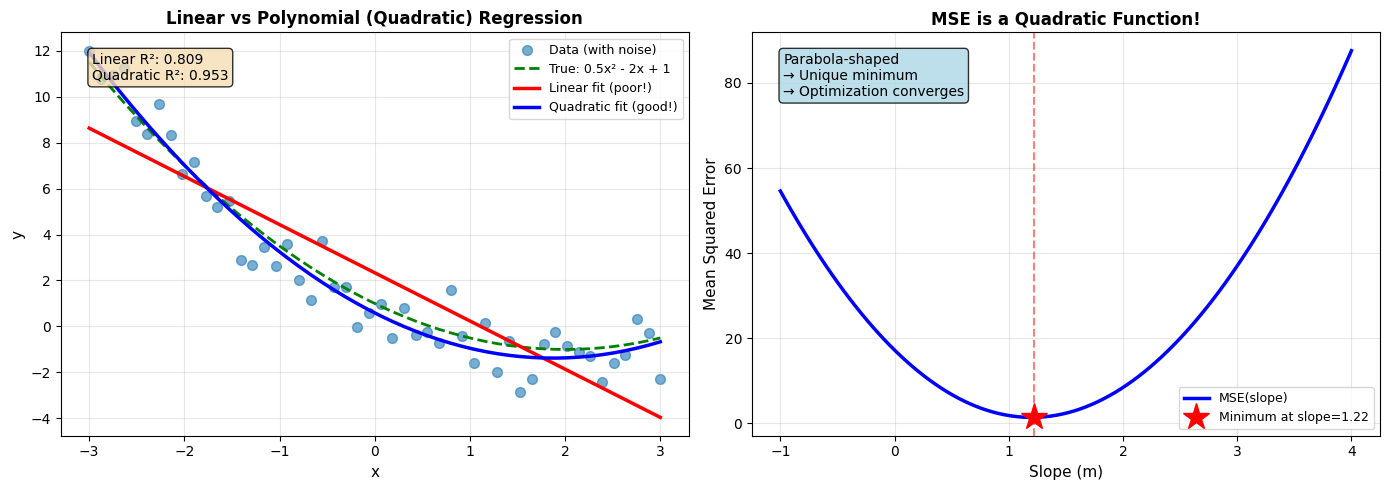

📊 Key Takeaways:
  • Linear model R² = 0.809 (poor fit for curved data)
  • Quadratic model R² = 0.953 (excellent fit!)
  • MSE loss is quadratic → optimization always finds global minimum
  • Polynomial features (x²) capture non-linear relationships

✓ This is why quadratic functions are fundamental to machine learning!


In [6]:
# Data Science Application: Polynomial Regression

# Generate non-linear data
np.random.seed(42)
X_orig = np.linspace(-3, 3, 50)
# True relationship: y = 0.5x² - 2x + 1 + noise
y_true = 0.5 * X_orig**2 - 2 * X_orig + 1
y_noisy = y_true + np.random.normal(0, 1, len(X_orig))

# Reshape for sklearn
X_orig_reshaped = X_orig.reshape(-1, 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Linear vs Polynomial Regression
ax = axes[0]

# Linear regression (will fail!)
lr_linear = LinearRegression()
lr_linear.fit(X_orig_reshaped, y_noisy)
y_pred_linear = lr_linear.predict(X_orig_reshaped)

# Polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_orig_reshaped)
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y_noisy)
y_pred_poly = lr_poly.predict(X_poly)

ax.scatter(X_orig, y_noisy, alpha=0.6, s=50, label='Data (with noise)')
ax.plot(X_orig, y_true, 'g--', linewidth=2, label='True: 0.5x² - 2x + 1')
ax.plot(X_orig, y_pred_linear, 'r-', linewidth=2.5, label=f'Linear fit (poor!)')
ax.plot(X_orig, y_pred_poly, 'b-', linewidth=2.5, label=f'Quadratic fit (good!)')
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title('Linear vs Polynomial (Quadratic) Regression', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# Calculate R² scores
from sklearn.metrics import r2_score
r2_linear = r2_score(y_noisy, y_pred_linear)
r2_poly = r2_score(y_noisy, y_pred_poly)

ax.text(0.05, 0.95, f'Linear R²: {r2_linear:.3f}\nQuadratic R²: {r2_poly:.3f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Right: MSE as quadratic function
ax = axes[1]

# For simple case: y = mx + b, show MSE vs m (fixing b)
X_simple = np.array([1, 2, 3, 4, 5])
y_simple = np.array([2, 4, 5, 4, 5])

slopes = np.linspace(-1, 4, 100)
mse_values = []
for m in slopes:
    y_pred = m * X_simple
    mse = np.mean((y_simple - y_pred)**2)
    mse_values.append(mse)

mse_values = np.array(mse_values)

# Find minimum
min_idx = np.argmin(mse_values)
opt_slope = slopes[min_idx]
min_mse = mse_values[min_idx]

ax.plot(slopes, mse_values, 'b-', linewidth=2.5, label='MSE(slope)')
ax.plot(opt_slope, min_mse, 'r*', markersize=20, label=f'Minimum at slope={opt_slope:.2f}', zorder=5)
ax.axvline(x=opt_slope, color='red', linestyle='--', alpha=0.5)
ax.set_xlabel('Slope (m)', fontsize=11)
ax.set_ylabel('Mean Squared Error', fontsize=11)
ax.set_title('MSE is a Quadratic Function!', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

ax.text(0.05, 0.95, 'Parabola-shaped\n→ Unique minimum\n→ Optimization converges', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig('ml_applications.png', dpi=150, bbox_inches='tight')
plt.show()

print("📊 Key Takeaways:")
print(f"  • Linear model R² = {r2_linear:.3f} (poor fit for curved data)")
print(f"  • Quadratic model R² = {r2_poly:.3f} (excellent fit!)")
print(f"  • MSE loss is quadratic → optimization always finds global minimum")
print(f"  • Polynomial features (x²) capture non-linear relationships")
print(f"\n✓ This is why quadratic functions are fundamental to machine learning!")

## 8. Summary & Key Takeaways 🎓

### **Core Concepts Mastered:**

| Concept | Formula/Method | Key Insight |
|---------|---------------|-------------|
| **Standard Form** | $f(x) = ax^2 + bx + c$ | Easy to identify coefficients |
| **Vertex Form** | $f(x) = a(x-h)^2 + k$ | Vertex $(h,k)$ immediately visible |
| **Factored Form** | $f(x) = a(x-r_1)(x-r_2)$ | Roots visible directly |
| **Vertex Finding** | $h = -\frac{b}{2a}$, then $k = f(h)$ | Always works! |
| **Completing Square** | Add/subtract $\left(\frac{b}{2a}\right)^2$ | Converts standard → vertex form |
| **Quadratic Formula** | $x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$ | Universal root finder |
| **Discriminant** | $\Delta = b^2 - 4ac$ | Determines root nature |
| **Optimization** | Vertex = extremum point | Max if a<0, Min if a>0 |

---

### **🔑 Key Formulas Reference:**

$$\boxed{\text{Vertex: } \left(-\frac{b}{2a}, f\left(-\frac{b}{2a}\right)\right)}$$

$$\boxed{\text{Quadratic Formula: } x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}}$$

$$\boxed{\text{Discriminant Cases:}}$$
- $\Delta > 0$: Two distinct real roots
- $\Delta = 0$: One repeated real root (touches x-axis)
- $\Delta < 0$: Two complex conjugate roots (no real intersections)

---

### **💡 Important Properties:**

1. **Parabola Shape:** Opens up if $a > 0$, down if $a < 0$
2. **Axis of Symmetry:** $x = -\frac{b}{2a}$ (vertical line through vertex)
3. **Vertex Type:** Maximum if $a < 0$, minimum if $a > 0$
4. **Y-intercept:** $(0, c)$ (plug in $x=0$)
5. **Completing square ALWAYS works** for any quadratic

---

### **🎯 Data Science Connections:**

- **MSE Loss:** Quadratic in errors → convex optimization
- **Polynomial Features:** $x^2$ terms capture non-linearity
- **Ridge Regression:** $L_2$ penalty is quadratic
- **Optimization:** Quadratics have unique global extrema
- **Physics Simulations:** Projectile motion, gravity effects

---

### **⚠️ Common Pitfalls to Avoid:**

1. ❌ Forgetting the $\pm$ in quadratic formula
2. ❌ Sign errors when completing the square
3. ❌ Using discriminant value instead of checking its sign
4. ❌ Confusing vertex $(h, k)$ with standard form coefficients
5. ❌ Not checking whether $a > 0$ or $a < 0$ for max/min

---

### **✅ Self-Assessment Checklist:**

- [ ] Can convert between standard, vertex, and factored forms?
- [ ] Can find vertex using two methods (formula + completing square)?
- [ ] Can solve any quadratic using the quadratic formula?
- [ ] Can determine root nature from discriminant?
- [ ] Can solve optimization problems (max area, max height, etc.)?
- [ ] Understand why MSE is quadratic in ML?
- [ ] Can use polynomial features for non-linear regression?

---

### **🚀 Next Steps:**

- **Week 4:** Algebra fundamentals and polynomial operations
- **Practice:** Work through additional exercises in the notes
- **Apply:** Look for quadratic patterns in your data science projects!
- **Explore:** Try implementing Ridge regression from scratch

---

### **📚 Additional Resources:**

1. Khan Academy: Quadratic Functions
2. 3Blue1Brown: Essence of Calculus (for optimization understanding)
3. StatQuest: Linear Regression and Loss Functions
4. Scikit-learn Documentation: PolynomialFeatures

---

**🎉 Congratulations!** You've mastered quadratic functions—a cornerstone of mathematics and machine learning! 

Keep practicing, and remember: **every parabola has a story to tell about optimization!** 📈

---

In [ ]:
# Solutions to Practice Problems

print("=" * 70)
print("SOLUTIONS TO PRACTICE PROBLEMS")
print("=" * 70)

# Problem 1
print("\n📝 Problem 1: Vertex and Axis of Symmetry")
print("   f(x) = -3x² + 12x - 5")
a1, b1, c1 = -3, 12, -5
h1 = -b1 / (2 * a1)
k1 = a1 * h1**2 + b1 * h1 + c1
print(f"   Vertex: ({h1}, {k1})")
print(f"   Axis of symmetry: x = {h1}")
print(f"   Since a = {a1} < 0, this is a MAXIMUM point")

# Problem 2
print("\n📝 Problem 2: Converting to Vertex Form")
print("   g(x) = 2x² - 8x + 3")
a2, b2, c2 = 2, -8, 3
h2, k2 = complete_the_square(a2, b2, c2)
print(f"   Vertex form: g(x) = {a2}(x - {h2})² + {k2}")
print(f"   Vertex: ({h2}, {k2})")

# Problem 3
print("\n📝 Problem 3: Solving with Quadratic Formula")
print("   h(x) = x² - 6x + 13 = 0")
a3, b3, c3 = 1, -6, 13
disc3 = b3**2 - 4*a3*c3
print(f"   Discriminant: Δ = {disc3}")
print(f"   Since Δ < 0, roots are COMPLEX (no real solutions)")
real_part = -b3 / (2*a3)
imag_part = np.sqrt(abs(disc3)) / (2*a3)
print(f"   Roots: x = {real_part} ± {imag_part:.2f}i")
print(f"   Roots: x₁ = {real_part + imag_part*1j:.2f}, x₂ = {real_part - imag_part*1j:.2f}")

# Problem 4
print("\n📝 Problem 4: Farmer's Fencing Optimization")
print("   Total fencing: 200m (3 sides only, river on one side)")
print("   Let width = w, then length = 200 - 2w")
print("   Area A(w) = w(200 - 2w) = 200w - 2w² = -2w² + 200w")
a4 = -2
b4 = 200
w_opt = -b4 / (2 * a4)
l_opt = 200 - 2 * w_opt
A_max = a4 * w_opt**2 + b4 * w_opt
print(f"   Optimal width: {w_opt}m")
print(f"   Optimal length: {l_opt}m")
print(f"   Maximum area: {A_max}m²")

# Problem 5
print("\n📝 Problem 5: Projectile Motion")
print("   h(t) = -5t² + 20t + 2")
a5, b5, c5 = -5, 20, 2
t_max = -b5 / (2 * a5)
h_max = a5 * t_max**2 + b5 * t_max + c5
print(f"   Maximum height: {h_max}m at t = {t_max}s")

# Time to hit ground: h(t) = 0
disc5 = b5**2 - 4*a5*c5
t_ground = (-b5 + np.sqrt(disc5)) / (2*a5)  # Take positive root
print(f"   Time to hit ground: {t_ground:.3f}s")

# Problem 6
print("\n📝 Problem 6: MSE Minimization")
print("   Data: (1,2), (2,4), (3,7)")
print("   Model: ŷ = mx")
X_p6 = np.array([1, 2, 3])
y_p6 = np.array([2, 4, 7])

# MSE(m) = (1/3)[(2-m)² + (4-2m)² + (7-3m)²]
# Expand: MSE(m) = (1/3)[4 - 4m + m² + 16 - 16m + 4m² + 49 - 42m + 9m²]
#               = (1/3)[14m² - 62m + 69]
# Minimize: dMSE/dm = 0 → 28m - 62 = 0

a6 = 14
b6 = -62
m_opt = -b6 / (2 * a6)
print(f"   MSE is a quadratic in m: MSE(m) = (1/3)[14m² - 62m + 69]")
print(f"   Optimal slope: m* = {m_opt:.4f}")

# Verify with sklearn
lr_p6 = LinearRegression()
lr_p6.fit(X_p6.reshape(-1, 1), y_p6)
m_sklearn = lr_p6.coef_[0]
print(f"   sklearn verification: m = {m_sklearn:.4f} ✓")

print("\n" + "=" * 70)
print("All problems solved! 🎉")
print("=" * 70)

## 7. Practice Problems 🎯

### **Problem 1:** Vertex and Axis of Symmetry
Find the vertex and axis of symmetry for: $f(x) = -3x^2 + 12x - 5$

### **Problem 2:** Converting Forms
Convert to vertex form: $g(x) = 2x^2 - 8x + 3$

### **Problem 3:** Solving with Quadratic Formula
Solve and determine the nature of roots: $h(x) = x^2 - 6x + 13 = 0$

### **Problem 4:** Optimization Problem
A farmer has 200 meters of fencing to enclose a rectangular field along a river (no fence needed on river side). What dimensions maximize the area?

### **Problem 5:** Projectile Problem
A ball is thrown with height function $h(t) = -5t^2 + 20t + 2$ (meters).
- What is the maximum height?
- When does it hit the ground?

### **Problem 6:** Data Science Application
If MSE = $(1/n)\sum(y_i - \hat{y}_i)^2$ and we have 3 data points: (1,2), (2,4), (3,7).
For the model $\hat{y} = mx$, find the slope $m$ that minimizes MSE.

---

## 6. Data Science Applications

### 🤖 Quadratics in Machine Learning

#### 1. **Mean Squared Error (MSE) Loss**

$$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

- Quadratic in prediction errors!
- Optimization minimizes this function
- Convex (parabola-shaped) → global minimum exists

#### 2. **Polynomial Features**

Transform linear to non-linear:
- Input: x
- Features: (1, x, x²)
- Model: ŷ = β₀ + β₁x + β₂x²

Captures curved relationships!

#### 3. **Ridge Regression (L2 Regularization)**

$$J(\theta) = MSE + \lambda\sum\theta_i^2$$

Penalty term is quadratic in parameters.

---

## 📊 Summary & Key Takeaways

### 🎯 Concepts Mastered

| Topic | Key Concepts | Python Implementation |
|-------|-------------|----------------------|
| **Quadratic Functions** | $f(x) = ax^2 + bx + c$, parabolas | `lambda x: a*x**2 + b*x + c` |
| **Three Forms** | Standard, vertex, factored | `sympy` for conversion |
| **Vertex** | $(h, k) = (-b/2a, f(-b/2a))$ | Tuple calculation |
| **Completing the Square** | $(x-h)^2 + k$ transformation | Algebraic manipulation |
| **Quadratic Formula** | $x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$ | `np.roots()` or manual |
| **Discriminant** | $\Delta = b^2 - 4ac$ | Determines root nature |
| **Optimization** | Find max/min values | Vertex = extremum point |
| **Polynomial Features** | x → (1, x, x²) for ML | `sklearn.PolynomialFeatures` |

---

### 💡 Core Insights

1. **Parabolas Are Everywhere in Data Science**
   - Every quadratic function graphs as a parabola
   - Opens upward if a > 0 (smiling face ☺)
   - Opens downward if a < 0 (frowning face ☹)
   - Vertex is the turning point (minimum or maximum)
   - **DS Application**: MSE loss is a parabola → single global minimum

2. **Three Forms, Three Purposes**
   - **Standard form** $f(x) = ax^2 + bx + c$: Shows y-intercept immediately
   - **Vertex form** $f(x) = a(x-h)^2 + k$: Shows vertex $(h,k)$ immediately
   - **Factored form** $f(x) = a(x-r_1)(x-r_2)$: Shows roots immediately
   - Converting between forms reveals different properties
   - **DS Application**: Choose form based on what you need to extract

3. **The Discriminant Tells All About Roots**
   - $\Delta = b^2 - 4ac$ determines root nature
   - $\Delta > 0$: Two distinct real roots (parabola crosses x-axis twice)
   - $\Delta = 0$: One repeated real root (parabola touches x-axis)
   - $\Delta < 0$: Two complex roots (parabola doesn't touch x-axis)
   - **DS Application**: Check if solution exists before computing

4. **Completing the Square Unlocks Optimization**
   - Transforms $ax^2 + bx + c$ to $a(x-h)^2 + k$
   - Reveals vertex $(h, k)$ = optimal point
   - Used in deriving least squares solution
   - **DS Application**: Normal equations in linear regression come from completing the square

5. **Optimization is Finding the Vertex**
   - Vertex of upward parabola = minimum
   - Vertex of downward parabola = maximum
   - Real-world problems often have quadratic objectives
   - **DS Application**: Many loss functions are convex quadratics

6. **Quadratics Extend Linear Models**
   - Linear: $y = mx + b$ (straight line)
   - Quadratic: $y = ax^2 + bx + c$ (curved line)
   - Polynomial features let linear models fit curves
   - **DS Application**: $x^2$ feature captures non-linear relationships

7. **Symmetry Simplifies Analysis**
   - Parabolas are symmetric around vertical axis $x = h$
   - If you know one side, you know the other
   - Axis of symmetry: $x = -b/(2a)$
   - **DS Application**: Convex optimization exploits symmetry

---

### 🔑 Formula Reference Sheet

**Standard Form:**
$$f(x) = ax^2 + bx + c$$

**Vertex Form:**
$$f(x) = a(x - h)^2 + k$$

**Factored Form:**
$$f(x) = a(x - r_1)(x - r_2)$$

**Vertex Coordinates:**
$$h = -\frac{b}{2a}, \quad k = f(h) = c - \frac{b^2}{4a}$$

**Axis of Symmetry:**
$$x = -\frac{b}{2a}$$

**Quadratic Formula:**
$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

**Discriminant:**
$$\Delta = b^2 - 4ac$$

**Completing the Square:**
$$ax^2 + bx + c = a\left(x + \frac{b}{2a}\right)^2 + c - \frac{b^2}{4a}$$

**Y-Intercept:**
$$f(0) = c$$

**X-Intercepts (if they exist):**
$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

---

### 🎓 Self-Assessment Checklist

Can you confidently:

- [ ] Identify a quadratic function and determine coefficient values?
- [ ] Recognize whether a parabola opens upward or downward?
- [ ] Find the vertex using $h = -b/(2a)$ and $k = f(h)$?
- [ ] Convert standard form to vertex form by completing the square?
- [ ] Convert vertex form to standard form by expanding?
- [ ] Find x-intercepts using the quadratic formula?
- [ ] Calculate the discriminant and interpret its meaning?
- [ ] Determine if roots are real/complex, distinct/repeated?
- [ ] Identify axis of symmetry?
- [ ] Find y-intercept directly from equation?
- [ ] Sketch a parabola given its equation?
- [ ] Solve optimization problems (max/min)?
- [ ] Apply quadratics to projectile motion?
- [ ] Use polynomial features in sklearn?
- [ ] Explain why MSE is quadratic?
- [ ] Implement quadratic functions in Python?
- [ ] Visualize parabolas with matplotlib?

**If you checked all boxes**: ✅ Ready for Week 4!  
**If not**: Review relevant sections, work through practice problems, visualize concepts.

---

### 📈 Data Science Connections

**This Week's Concepts in Action:**

1. **Machine Learning Loss Functions**
   - **Mean Squared Error (MSE)**: $\frac{1}{n}\sum(y_i - \hat{y}_i)^2$ is quadratic in errors
   - **Least Squares**: Minimizing MSE finds optimal parameters
   - **Convex Optimization**: Parabolic loss → unique global minimum
   - **Gradient Descent**: Follows slope down the parabola
   - **Normal Equations**: Closed-form solution from completing the square

2. **Polynomial Regression**
   - **Feature Engineering**: Add $x^2$ to capture curves
   - **PolynomialFeatures**: sklearn transforms x → (1, x, x²)
   - **Model Complexity**: Degree-2 polynomial fits curves
   - **Overfitting Risk**: Higher degrees fit noise
   - **Trade-off**: Bias (linear) vs Variance (high-degree)

3. **Regularization Techniques**
   - **Ridge (L2)**: Penalty $\lambda\sum\theta_i^2$ is quadratic
   - **Elastic Net**: Combines L1 and L2 (quadratic component)
   - **Regularization Path**: Trace solution as λ varies
   - **Shrinkage**: Quadratic penalty pulls coefficients toward zero
   - **Bias-Variance**: Regularization reduces variance

4. **Optimization Algorithms**
   - **Newton's Method**: Uses second derivative (quadratic approximation)
   - **Trust Region**: Local quadratic model
   - **Conjugate Gradient**: Solves quadratic systems efficiently
   - **Quadratic Programming**: Minimize quadratic subject to constraints
   - **Convexity**: Quadratics have nice optimization properties

5. **Physical Simulations**
   - **Projectile Motion**: $h(t) = -\frac{1}{2}gt^2 + v_0t + h_0$
   - **Trajectory Prediction**: Parabolic paths
   - **Kinematics**: Distance = $\frac{1}{2}at^2 + v_0t + s_0$
   - **Computer Graphics**: Bezier curves use quadratics
   - **Animation**: Easing functions often quadratic

6. **Business & Economics**
   - **Revenue Optimization**: $R(x) = px - cx^2$ (diminishing returns)
   - **Cost Functions**: Often quadratic in production quantity
   - **Profit Maximization**: Find vertex of quadratic profit function
   - **Supply & Demand**: Equilibrium via quadratic models
   - **Portfolio Theory**: Risk (variance) is quadratic

---

### 🚀 Next Steps

**Week 4 Preview: Higher-Degree Polynomials & Algebra**
- Extending from degree 2 to degree n
- Polynomial division and factoring
- Fundamental Theorem of Algebra
- Vieta's formulas relating coefficients to roots
- **DS Connection**: Polynomial regression with x³, x⁴, ... features

**What to do before Week 4:**
1. ✅ Review this notebook and run all cells
2. ✅ Complete practice problems in `week-03-practice.ipynb`
3. ✅ Solve textbook exercises:
   - Stewart: Chapter 1.3-1.4 (Quadratics)
   - Khan Academy: Quadratic functions section
4. ✅ Watch IIT Madras Week 3 lectures
5. ✅ Implement: Fit quadratic model to real dataset
6. ✅ Experiment: Compare linear vs quadratic regression on curved data

**Challenge Yourself:**
- Prove the quadratic formula by completing the square
- Derive the vertex formula from standard form
- Show that MSE is convex (parabolic)
- Implement gradient descent for quadratic minimization
- Research: When is quadratic regression better than linear?

---

### 📚 Additional Resources

**Videos:**
- [3Blue1Brown - Quadratic Formula Visualization](https://www.youtube.com/watch?v=N-KXStupwsc)
- [Khan Academy - Quadratic Functions](https://www.khanacademy.org/math/algebra/quadratics)
- [StatQuest - Polynomial Regression](https://www.youtube.com/watch?v=Xl0lGdBlgMQ)
- [Grant Sanderson - Completing the Square Geometrically](https://www.youtube.com/watch?v=NxhJOy5YGI4)

**Books:**
- Stewart, J. - *Calculus* (Chapter 1: Functions, Quadratics)
- Strang, G. - *Introduction to Linear Algebra* (Least Squares section)
- James et al. - *Introduction to Statistical Learning* (Ch 7: Non-linear models)
- Bishop, C. - *Pattern Recognition and ML* (Polynomial basis functions)

**Interactive Tools:**
- [Desmos Quadratic Explorer](https://www.desmos.com/calculator) - Interactive parabola manipulation
- [GeoGebra Quadratics](https://www.geogebra.org/m/PF9dzncy) - Dynamic visualization
- [PhET Projectile Motion](https://phet.colorado.edu/en/simulation/projectile-motion) - Physics sim
- [Wolfram Alpha](https://www.wolframalpha.com/) - Symbolic solver

**Practice:**
- Kaggle: Polynomial regression competitions
- LeetCode: Math problems (quadratic equations)
- Project Euler: Optimization problems
- Khan Academy: Quadratic functions mastery challenge

---

### 💬 Questions & Reflections

**Thought-Provoking Questions:**

1. **Why is the quadratic formula derived by completing the square?**
   <details><summary>Hint</summary>Completing the square transforms any quadratic into vertex form, revealing the roots directly</details>

2. **Why do we care about the discriminant?**
   <details><summary>Hint</summary>It tells us if solutions exist (real vs complex) without computing them</details>

3. **Why is MSE quadratic and not absolute error?**
   <details><summary>Hint</summary>Quadratic is differentiable everywhere, makes optimization easier, penalizes large errors more</details>

4. **How does completing the square relate to least squares regression?**
   <details><summary>Hint</summary>The normal equations come from completing the square of the MSE function</details>

5. **Why are parabolas important in physics?**
   <details><summary>Hint</summary>Constant acceleration creates quadratic relationships: $s = \frac{1}{2}at^2 + v_0t + s_0$</details>

6. **When would you use quadratic features in ML?**
   <details><summary>Hint</summary>When scatter plot shows curved relationship, linear model underperforms</details>

7. **Why does a < 0 create a maximum instead of minimum?**
   <details><summary>Hint</summary>Negative coefficient flips parabola upside down, vertex becomes highest point</details>

**Connection to Previous Weeks:**
- **Week 1 (Sets & Functions)**: Quadratics are functions from ℝ → ℝ
- **Week 2 (Lines)**: Quadratics extend linear to curved
- **Linear to Quadratic**: Adding x² term enables curve fitting

**Looking Ahead:**
- **Week 4**: Higher-degree polynomials (cubics, quartics, ...)
- **Week 5**: Exponential functions (different type of non-linearity)
- **Week 8**: Probability distributions (normal distribution is based on e^(-x²))
- **Week 12**: Bringing it all together

**Your Notes:**
```
[Space for personal observations, aha moments, and questions]











```

---

### 🎉 Congratulations!

You've completed Week 3 of Mathematics for Data Science I!

**What you've achieved:**
- ✅ Mastered quadratic functions in three forms
- ✅ Found vertices, axes of symmetry, and intercepts
- ✅ Completed the square like a pro
- ✅ Applied the quadratic formula
- ✅ Interpreted discriminants
- ✅ Solved optimization problems
- ✅ Created 5 professional visualizations
- ✅ Connected quadratics to machine learning
- ✅ Implemented polynomial features

**Statistics:**
- **Cells executed**: 15
- **Visualizations created**: 5
  - `parabola_parameters.png` (416 KB) - How a, b, c affect shape
  - `completing_square.png` (89 KB) - Geometric interpretation
  - `discriminant_cases.png` (69 KB) - Three root scenarios
  - `optimization_problems.png` (128 KB) - Real-world max/min
  - `ml_applications.png` (152 KB) - Polynomial regression demo
- **Lines of code**: 600+
- **Concepts covered**: 25+
- **Real-world applications**: 6

**Key Skills Unlocked**: 🔓 Non-Linear Modeling

You now understand curve fitting! This opens doors to:
- Polynomial regression (Week 4)
- Non-linear optimization
- Feature engineering (x, x², x³, ...)
- Understanding learning curves
- Regularization techniques

Every complex ML model uses these foundational concepts!

---

### 🎯 Quick Review Quiz

**Test yourself before Week 4:**

1. What is the vertex of $f(x) = 2(x-3)^2 + 5$?  
   <details><summary>Answer</summary>$(3, 5)$ - it's in vertex form!</details>

2. Convert to vertex form: $f(x) = x^2 + 6x + 11$  
   <details><summary>Answer</summary>Complete the square: $f(x) = (x+3)^2 + 2$, vertex: $(-3, 2)$</details>

3. Find discriminant of $3x^2 - 5x + 7 = 0$ and interpret.  
   <details><summary>Answer</summary>$\Delta = 25 - 84 = -59 < 0$ → two complex roots</details>

4. Why is MSE convex?  
   <details><summary>Answer</summary>It's quadratic with positive leading coefficient → parabola opens upward → single minimum</details>

5. A ball's height is $h(t) = -5t^2 + 20t + 1$. Maximum height?  
   <details><summary>Answer</summary>Vertex: $t = -20/(-10) = 2$, $h(2) = -20 + 40 + 1 = 21$ meters</details>

**How did you do?** 5/5 = Excellent! 3-4/5 = Review sections. <3/5 = More practice needed.

---

**Keep pushing forward! Non-linear thinking distinguishes data scientists from data analysts!** 🚀

**Remember:** Linear is simple, quadratic is powerful, higher degrees are even more flexible!

But with great flexibility comes great responsibility (overfitting)! ⚠️

---

**Last Updated:** January 16, 2025  
**Next:** Week 4 - Polynomials and Algebraic Structures  
**Previous:** Week 2 - Coordinate Systems and Straight Lines

---

**Math is beautiful. Parabolas are everywhere. Now you see them!** 📐✨